```
!pip3.10 install swig
!pip3.10 install gym[box2d]
!pip3.10 install imageio imageio[ffmpeg]
!pip3.10 install stable-baselines3[extra]
!pip3.10 install -e ../
```

In [5]:
import gymnasium as gym
from IPython.display import Video
import sys
import os

os.environ["SDL_VIDEODRIVER"] = "dummy" # this stops pygame opening it's own window


In [2]:
%load_ext autoreload

In [3]:
import gymnasium as gym
from environments.model_ready_boids import RavenChasingBoids

from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy


In [4]:
%autoreload 2
# Now import the function
import gym_utils
import controllers
import agents
import runners
import environments
from environments.simple_boids import PureBoinds, BoidsWithRavenoid
from gym_utils.vis import create_environment_video

In [ ]:
env = PureBoinds(100, render_mode="rgb_array")


# Create a video
video_filename = 'boids.mp4'
create_environment_video(env, video_filename, steps=200)

# Display the video
Video(video_filename)

In [51]:
env = BoidsWithRavenoid(100, render_mode="rgb_array")
from gymnasium.wrappers import FrameStack
env = FrameStack(env, num_stack=7)

# Create a video
video_filename = 'boids.mp4'
create_environment_video(env, video_filename, steps=200)

# Display the video
Video(video_filename)

AttributeError: 'NoneType' object has no attribute 'shape'

In [7]:
from environments.model_ready_boids import RavenChasingBoids

class AlternatingActionModel:
    def __init__(self, env):
        self.action_space = env.action_space
        self.step_count = 0
        self.env = env

    def predict(self, observation, state=None, episode_start=None, deterministic=None):
        # Define the policy: alternate between action 1 and action 2 every 4 steps
        action_period = 4
        if (self.step_count // action_period) % 2 == 0:
            action = 1  # Use action 1 for 4 steps
        else:
            action = 2  # Then switch to action 2 for the next 4 steps

        self.step_count += 1
        return action, state

    def get_env(self): return self.env
        
env = RavenChasingBoids(10, render_mode="rgb_array")
print(env.history)
model = AlternatingActionModel(env)

from gym_utils.vis import create_environment_video_with_model

video_filename = 'mock_boids.mp4'
create_environment_video_with_model(model, video_filename, steps=1000)
print(env.history)
Video(video_filename)

[]
0 steps taken. Average steps per episode: nan


/Users/patrick/Projects/active_projects/zero-player-games/zero-player-games/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/patrick/Projects/active_projects/zero-player-games/zero-player-games/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[]


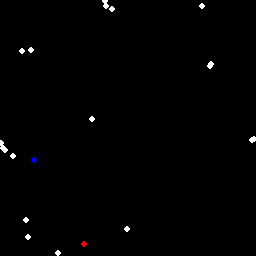

In [36]:
from PIL import Image
env = RavenChasingBoids(20, render_mode="rgb_array")
env.step(0)
for i in range(100):
    env.step(0)
arr = env.render()
Image.fromarray(arr)

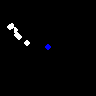

In [37]:
Image.fromarray(env._get_obs())

In [43]:
from environments.model_ready_boids import RavenChasingBoids


from stable_baselines3.common.env_checker import check_env
env = RavenChasingBoids(20, render_mode="rgb_array")
check_env(env)


0 steps taken. Average steps per episode: nan
0 steps taken. Average steps per episode: nan
1 steps taken. Average steps per episode: nan


In [ ]:
# wow, that passed

In [49]:
from gymnasium.wrappers import FrameStack
env = FrameStack(env, num_stack=7)

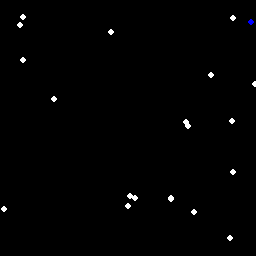

In [50]:
Image.fromarray(env.render())

In [7]:
# Create environment
env = RavenChasingBoids(20, render_mode="rgb_array")

# Instantiate the agent
model = DQN("MlpPolicy", env, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [41]:



# Train the agent and display a progress bar
model.learn(total_timesteps=int(2e6))


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
0 steps taken. Average steps per episode: nan


/Users/patrick/Projects/active_projects/zero-player-games/zero-player-games/lib/python3.10/site-packages/stable_baselines3/common/buffers.py:231: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 55.31GB > 7.73GB
  warnings.warn(
/Users/patrick/Projects/active_projects/zero-player-games/zero-player-games/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/patrick/Projects/active_projects/zero-player-games/zero-player-games/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


1001 steps taken. Average steps per episode: 1001.0
806 steps taken. Average steps per episode: 903.5
1001 steps taken. Average steps per episode: 936.0
359 steps taken. Average steps per episode: 791.75
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 792      |
|    ep_rew_mean      | 2.25     |
|    exploration_rate | 0.985    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 271      |
|    time_elapsed     | 11       |
|    total_timesteps  | 3167     |
----------------------------------
1001 steps taken. Average steps per episode: 833.6
490 steps taken. Average steps per episode: 776.3333333333334
1001 steps taken. Average steps per episode: 808.4285714285714
1001 steps taken. Average steps per episode: 832.5
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 832      |
|    ep_rew_mean      | 1.88     |
|    exploration_rate | 0.968    |
| time/  

KeyboardInterrupt: 

In [31]:
model.save("ravenoid_2M_its")

In [32]:
model = DQN.load("ravenoid_2M_its", env=env)
mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)



Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
388 steps taken. Average steps per episode: 795.0743538767396


/Users/patrick/Projects/active_projects/zero-player-games/zero-player-games/lib/python3.10/site-packages/stable_baselines3/common/buffers.py:231: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 55.31GB > 3.95GB
  warnings.warn(


700 steps taken. Average steps per episode: 795.0365659777425
363 steps taken. Average steps per episode: 794.864918553834
1001 steps taken. Average steps per episode: 794.9467831612391
1001 steps taken. Average steps per episode: 795.0285827709408
1001 steps taken. Average steps per episode: 795.1103174603174
721 steps taken. Average steps per episode: 795.0809202697342
237 steps taken. Average steps per episode: 794.8596352101507
1001 steps taken. Average steps per episode: 794.9413396749901
1001 steps taken. Average steps per episode: 795.0229793977813
635 steps taken. Average steps per episode: 794.9596039603961


In [33]:
print(mean_reward, std_reward)

2.0 1.0954451150103321


In [52]:
env = RavenChasingBoids(20, render_mode="rgb_array")
model = DQN.load("../training/model_training_111724_1_cloud", env=env)

video_filename = 'ravenoid.mp4'
create_environment_video_with_model(model, video_filename, steps=2000)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
0 steps taken. Average steps per episode: nan


/Users/patrick/Projects/active_projects/zero-player-games/zero-player-games/lib/python3.10/site-packages/stable_baselines3/common/buffers.py:231: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 55.31GB > 4.45GB
  warnings.warn(
/Users/patrick/Projects/active_projects/zero-player-games/zero-player-games/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/patrick/Projects/active_projects/zero-player-games/zero-player-games/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


1304 steps taken. Average steps per episode: 1304.0


In [53]:
Video(video_filename)

In [3]:
from gym_utils.vis import create_environment_video_with_model, create_environment_video
from stable_baselines3 import DQN
from environments.model_ready_boids import RavenChasingBoids
from environments.simple_boids import BoidsWithRavenoid

In [10]:
env = RavenChasingBoids(20, render_mode="rgb_array")


In [11]:
env.n_boids

20

In [6]:
env = BoidsWithRavenoid(100, render_mode="rgb_array")
# Create a video
video_filename = 'boids.mp4'
create_environment_video(env, video_filename, steps=200)

# Display the video
Video(video_filename)